# <span style="color:darkblue"> QTM 151 - Quiz 2 </span>

## Try to submit as an HTML file

<font size="5"> 

Print your name below

In [1]:
# Write your answer here

print("Sean Chang")


Sean Chang


<font size = "5" >
This quiz is open book 

- You can use the lecture notes
- You will get partial credit for attempting the questions
- To get full credit, the code should run as intended
- You should <span style="color:red"> NOT </span> communicate with other students

Print the following message: <br>

"I will abide by Emory's code of conduct"


In [2]:
# Write your answer here:

print("I will abide by Emory's code of conduct")


I will abide by Emory's code of conduct


<font size = "5">

Import the libraries "numpy", "matplotlib.pyplot", <br>
"pandas", "statsmodels.api" and "statsmodels.formula.api"


In [3]:
# Write your answer here

import numpy as np 
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

<font size = "5">

Read the dataset "data_quiz/fifa23_players_basic.csv"

- It's a dataset on professional soccer players
- Rows correspond to players (18,539)
- Columns contain attributes of players (32)
- Try to view the dataset before starting <br>
to get a sense of its content

In [ ]:
# Write your own code

fifa23 = pd.read_csv("/Users/seanchang/Documents/GitHub/qtm151spring2025/Quiz2/data_quiz/fifa23_players_basic.csv")
print(fifa23.shape)
fifa23.head()


(18539, 33)


,Unnamed: 0,Known As,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Image Link,Age,Height(in cm),Weight(in kg),TotalStats,BaseStats,Club Name,Wage(in Euro),Release Clause,Club Position,Contract Until,Club Jersey Number,Joined On,On Loan,Preferred Foot,Weak Foot Rating,Skill Moves,International Reputation,National Team Name,National Team Image Link,National Team Position,National Team Jersey Number,Attacking Work Rate,Defensive Work Rate
0,0,L. Messi,Lionel Messi,91,91,54000000,RW,CAM,Argentina,https://cdn.sofifa.net/players/158/023/23_60.png,35,169,67,2190,452,Paris Saint-Germain,195000,99900000,RW,2023,30,2021,-,Left,4,4,5,Argentina,https://cdn.sofifa.net/flags/ar.png,RW,10,Low,Low
1,1,K. Benzema,Karim Benzema,91,91,64000000,"CF,ST",CF,France,https://cdn.sofifa.net/players/165/153/23_60.png,34,185,81,2147,455,Real Madrid CF,450000,131199999,CF,2023,9,2009,-,Right,4,4,4,France,https://cdn.sofifa.net/flags/fr.png,ST,19,Medium,Medium
2,2,R. Lewandowski,Robert Lewandowski,91,91,84000000,ST,ST,Poland,https://cdn.sofifa.net/players/188/545/23_60.png,33,185,81,2205,458,FC Barcelona,420000,172200000,ST,2025,9,2022,-,Right,4,4,5,Poland,https://cdn.sofifa.net/flags/pl.png,ST,9,High,Medium
3,3,K. De Bruyne,Kevin De Bruyne,91,91,107500000,"CM,CAM",CM,Belgium,https://cdn.sofifa.net/players/192/985/23_60.png,31,181,70,2303,483,Manchester City,350000,198900000,CM,2025,17,2015,-,Right,5,4,4,Belgium,https://cdn.sofifa.net/flags/be.png,RF,7,High,High
4,4,K. Mbappé,Kylian Mbappé,91,95,190500000,"ST,LW",ST,France,https://cdn.sofifa.net/players/231/747/23_60.png,23,182,73,2177,470,Paris Saint-Germain,230000,366700000,ST,2024,7,2018,-,Right,4,5,4,France,https://cdn.sofifa.net/flags/fr.png,ST,10,High,Low


<font size = "5">

(a) Use queries

<font size = "3">

- Browse the dataset and search for the height variable in cm (centimeters).

- Subset the players whose value of the height variable is above 175 <br>
and store it in a new dataset
- How many players are above this height threshold?

HINT: Remember that there is a special syntax for <br>
when the column names have spaces (see Lecture 10) <br>
and when the value is a string. See example provided.

In [10]:
# Write your own code

# Example: The following code filters whether 
# observations for which `On Loan` is equal to yes
# dataset.query(' `On Loan` == "YES" ')
# Note: be careful with using backward quotations ` here.
# Now apply this to your own example, and calculate the total number of observations.

players_above_175 = fifa23.query('`Height(in cm)` > 175')
num_players_above_175 = players_above_175.shape[0]
print("Number of players above 175 cm:", num_players_above_175)


Number of players above 175 cm: 14653


<font size = "5">

(b) Use sorting + ".iloc[]"

<font size = "3">

The varable "Contract Until" shows the date in which a player's contract will expire.
- Use ".sort_values()" to order the "Contract Until" column <br>
from later dates to earlier dates.
- Get a subset with the 5 players in the dataset <br>
whose contracts will expire later.
- From this subset, display the names and year in which the contract will expire.

Your output should look something like this:

| Full Name | Contract Until |
| -------- | ------- | 
| José Luis García Vayá | 2032
| José Luis García Vayá | 2032
| Jon Moncayola Tollar | 2031
| Jon Moncayloa Tollar | 2031
| Josip Sutalo | 2028
| Aurelien Tchouaméni | 2028


In [22]:
# Write your own code

sorted_fifa23 = fifa23.sort_values(by='Contract Until', ascending=False)
top_5_contracts = sorted_fifa23.iloc[:5][['Full Name', 'Contract Until']]
print(top_5_contracts)

                  Full Name Contract Until
1876  Jose Luís García Vayá           2032
1806  Jose Luís García Vayá           2032
1478   Jon Moncayola Tollar           2031
1523   Jon Moncayola Tollar           2031
1649           Josip Šutalo           2028


<font size = "5">

(c) Create a function and apply it to a column <br>

<font size = "3">

Step 1:
- Define a function with a parameter "TotalStats"
- If "TotalStats > 85", classification = "Top Performer"
- If "TotalStats <= 85", classification = "Non Top-Performer"
- The function returns "classification"

Step 2:
- Extract the column "TotalStats" in the dataset <br>
- Create a new variable called "player_classification" <br>
to assign each player to the correct classification

HINT: Use the ".apply()" function

In [23]:
# Write your own code

def classify_player(TotalStats):
    if TotalStats > 85:
        return "Top Performer"
    else:
        return "Non Top-Performer"

fifa23['player_classification'] = fifa23['TotalStats'].apply(classify_player)
fifa23.head()

fifa23

,Unnamed: 0,Known As,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Image Link,Age,Height(in cm),Weight(in kg),TotalStats,BaseStats,Club Name,Wage(in Euro),Release Clause,Club Position,Contract Until,Club Jersey Number,Joined On,On Loan,Preferred Foot,Weak Foot Rating,Skill Moves,International Reputation,National Team Name,National Team Image Link,National Team Position,National Team Jersey Number,Attacking Work Rate,Defensive Work Rate,player_classification
0,0,L. Messi,Lionel Messi,91,91,54000000,RW,CAM,Argentina,https://cdn.sofifa.net/players/158/023/23_60.png,35,169,67,2190,452,Paris Saint-Germain,195000,99900000,RW,2023,30,2021,-,Left,4,4,5,Argentina,https://cdn.sofifa.net/flags/ar.png,RW,10,Low,Low,Top Performer
1,1,K. Benzema,Karim Benzema,91,91,64000000,"CF,ST",CF,France,https://cdn.sofifa.net/players/165/153/23_60.png,34,185,81,2147,455,Real Madrid CF,450000,131199999,CF,2023,9,2009,-,Right,4,4,4,France,https://cdn.sofifa.net/flags/fr.png,ST,19,Medium,Medium,Top Performer
2,2,R. Lewandowski,Robert Lewandowski,91,91,84000000,ST,ST,Poland,https://cdn.sofifa.net/players/188/545/23_60.png,33,185,81,2205,458,FC Barcelona,420000,172200000,ST,2025,9,2022,-,Right,4,4,5,Poland,https://cdn.sofifa.net/flags/pl.png,ST,9,High,Medium,Top Performer
3,3,K. De Bruyne,Kevin De Bruyne,91,91,107500000,"CM,CAM",CM,Belgium,https://cdn.sofifa.net/players/192/985/23_60.png,31,181,70,2303,483,Manchester City,350000,198900000,CM,2025,17,2015,-,Right,5,4,4,Belgium,https://cdn.sofifa.net/flags/be.png,RF,7,High,High,Top Performer
4,4,K. Mbappé,Kylian Mbappé,91,95,190500000,"ST,LW",ST,France,https://cdn.sofifa.net/players/231/747/23_60.png,23,182,73,2177,470,Paris Saint-Germain,230000,366700000,ST,2024,7,2018,-,Right,4,5,4,France,https://cdn.sofifa.net/flags/fr.png,ST,10,High,Low,Top Performer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18534,18534,D. Collins,Darren Collins,47,56,110000,"ST,RM",CAM,Republic of Ireland,https://cdn.sofifa.net/players/243/725/23_60.png,21,174,68,1287,274,Sligo Rovers,500,193000,RES,2022,20,2018,-,Right,3,2,1,-,-,-,-,Medium,Medium,Top Performer
18535,18535,Yang Dejiang,Dejiang Yang,47,57,90000,CDM,CDM,China PR,https://cdn.sofifa.net/players/261/933/23_60.png,17,175,60,1289,267,Guangzhou FC,500,158000,SUB,2023,30,2021,-,Right,3,2,1,-,-,-,-,Medium,Medium,Top Performer
18536,18536,L. Mullan,Liam Mullan,47,67,130000,CM,RM,Northern Ireland,https://cdn.sofifa.net/players/267/823/23_60.png,18,170,65,1333,277,Derry City,500,332000,SUB,2023,38,2022,-,Right,3,2,1,-,-,-,-,High,Medium,Top Performer
18537,18537,D. McCallion,Daithí McCallion,47,61,100000,CB,CB,Republic of Ireland,https://cdn.sofifa.net/players/267/824/23_60.png,17,178,65,1113,226,Derry City,500,218000,SUB,2024,37,2022,-,Right,3,2,1,-,-,-,-,Medium,Medium,Top Performer


<font size = "5">

(d) Regression function

<font size = "3">

- Run a regression of "Overall" (left-hand side) on "Age" (right-hand side)
- What are the values of the coefficients?

[HINT: Use the commands ```smf.ols()``` and ```.fit()``` and ```.params``` <br>
from Lecture 11 ]


In [15]:
# Write your own code

regression = smf.ols('Overall ~ Age', data=fifa23).fit()
coefficients = regression.params
print(coefficients)

Intercept    49.787345
Age           0.636467
dtype: float64


<font size = "5">

(e) Split a dataset into subsets

<font size = "3">

- Store the total number of rows of the dataset in a variable called ```n``` <br>
- Create a new variable called ```random_var``` drawn from a <br>
uniform distribution between 0 and 1 with size ```n```
- Use .query() to subset all observations with ```random_var <0.4```.<br>
store it in a new dataset called "data0"
- Use .query() to subset all observations with ```random_var >= 0.4```.<br>
store it in a new dataset called "data1"

[HINT: See Lecture 2 for how to generate a uniform random variable]


In [16]:
# Write your own code
n = fifa23.shape[0]

random_var = np.random.uniform(0, 1, n)

fifa23['random_var'] = random_var

data0 = fifa23.query('random_var < 0.4')

data1 = fifa23.query('random_var >= 0.4')

print(data0.head())
print(data1.head())

    Unnamed: 0        Known As  ... player_classification  random_var
2            2  R. Lewandowski  ...         Top Performer    0.210856
4            4       K. Mbappé  ...         Top Performer    0.123248
5            5        M. Salah  ...         Top Performer    0.089178
11          11       Neymar Jr  ...         Top Performer    0.167328
12          12          H. Son  ...         Top Performer    0.399706

[5 rows x 35 columns]
   Unnamed: 0      Known As  ... player_classification  random_var
0           0      L. Messi  ...         Top Performer    0.798583
1           1    K. Benzema  ...         Top Performer    0.941268
3           3  K. De Bruyne  ...         Top Performer    0.604587
6           6   T. Courtois  ...         Top Performer    0.615990
7           7      M. Neuer  ...         Top Performer    0.598490

[5 rows x 35 columns]


<font size = "5">

(f) Create two overlapping scatter plots

<font size = "3">

- This question requires the two datasets you created in (e)
- Display a scatter plot of "Potential" vs "Age" for "data0" using <br>
```plt.scatter()```
- Display a scatter plot of "Potential" vs "Age" for "data1" overlapping <br> 
on top of the previous one 
- You will need to add a legend, label the axes, and the title
- To get full points, plot the scatter plot with the option  ```alpha = 0.5```, e.g. <br>
 ``` plt.hist(x = ..., y = ... , alpha = 0.5) ``` <br>
 Make sure to substitute the corresponding "x" and "y" vectors instead of ```...``` <br>
(The alpha option sets the transparency of the scatter plot)

Note: The goal of this question is to illustrate that random <br>
assignment will produce very similar scatter plots for each variable

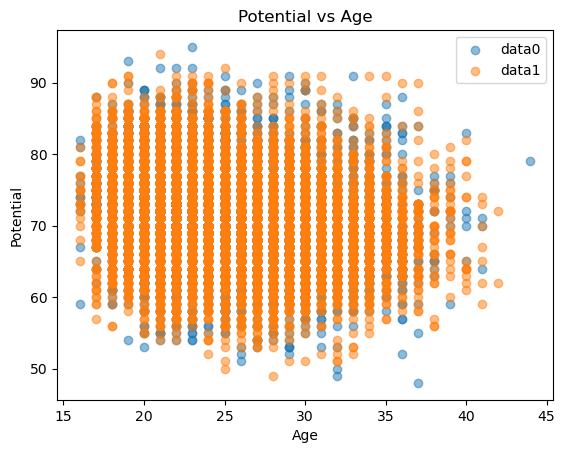

In [17]:
# Write your own code

plt.scatter(data0['Age'], data0['Potential'], alpha=0.5, label='data0')
plt.scatter(data1['Age'], data1['Potential'], alpha=0.5, label='data1')
plt.xlabel('Age')
plt.ylabel('Potential')
plt.title('Potential vs Age')
plt.legend()
plt.show()